In [2]:
import matplotlib.pyplot as plt
import torch

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

In [3]:
def extract_accuracy_from_file(file_path):
    """
    Extracts the accuracy value from a specified file.
    
    Args:
    file_path (str): The path to the file containing the accuracy information.
    
    Returns:
    float: The accuracy value extracted from the file, or None if not found.
    """
    accuracy = None
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if 'Accuracy:' in line:
                    # This splits the line at 'Accuracy:' and takes the second part,
                    # then splits again at '/' to get the first part which contains the accuracy number,
                    # and strips parentheses and percentage sign before converting to float.
                    accuracy = float(line.split('Accuracy:')[1].split('/')[0].strip().split('%')[0].strip())
                    break
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return accuracy

VARIED CONTROL OF ATTACKER


In [37]:
model_names = ['resnet18']
modes = ['attacker']
baseline_path = 'baseline_acc'
attack_names = ['input_based_attack', 'weight_based_attack', 'weight_input_based_attack'] 
configs = []
list = [10,20,30,40,50,60,70,90]
for l in list:
    l1 = round(100-l,1)
    configs.append(f"{l}.0_{l1}.0")

In [38]:
baseline_path = 'baseline_acc' 
for model_name in model_names:
    accuracy_data = {}
    delta_accuracy = {}
    baseline_accuracy = torch.load(f'{baseline_path}/accuracy_data_{model_name}.pt')
    for mode in modes:
        
        for attack_no,attack_name in enumerate(attack_names):
            accuracy_data[attack_name] = {} 
            for config_no,config in enumerate(configs):
                
                print(config)
                path = f'results_var/{attack_name}/{model_name}/{config}/accuracy_output_{mode}.txt'
                print(path)
                print(extract_accuracy_from_file(path)/100,2)
                accuracy_data[attack_name][config] =  round(extract_accuracy_from_file(path)/100,2)
                print(accuracy_data[attack_name][config] )
                # delta_accuracy[f'A_{attack_no}_C_{config_no}'] = accuracy_data[f'A_{attack_no}_C_{config_no}'] 
            path = f'results/{attack_name}/{model_name}/80_20/accuracy_output_{mode}.txt'
            print(extract_accuracy_from_file(path)/100,2)
            accuracy_data[attack_name]["80.0_20.0"]= extract_accuracy_from_file(path)/100 
        torch.save(accuracy_data, f'accuracy/accuracy_data_{model_name}_{mode}.pt')
        # torch.save(delta_accuracy, f'accuracy/delta_accuracy_{model_name}_{mode}.pt')
    print(accuracy_data)
    # print(delta_accuracy)

10.0_90.0
results_var/input_based_attack/resnet18/10.0_90.0/accuracy_output_attacker.txt
39.48 2
39.48
20.0_80.0
results_var/input_based_attack/resnet18/20.0_80.0/accuracy_output_attacker.txt
84.6 2
84.6
30.0_70.0
results_var/input_based_attack/resnet18/30.0_70.0/accuracy_output_attacker.txt
90.65 2
90.65
40.0_60.0
results_var/input_based_attack/resnet18/40.0_60.0/accuracy_output_attacker.txt
92.35 2
92.35
50.0_50.0
results_var/input_based_attack/resnet18/50.0_50.0/accuracy_output_attacker.txt
93.03 2
93.03
60.0_40.0
results_var/input_based_attack/resnet18/60.0_40.0/accuracy_output_attacker.txt
93.41 2
93.41
70.0_30.0
results_var/input_based_attack/resnet18/70.0_30.0/accuracy_output_attacker.txt
93.51 2
93.51
90.0_10.0
results_var/input_based_attack/resnet18/90.0_10.0/accuracy_output_attacker.txt
93.68 2
93.68
93.51 2
10.0_90.0
results_var/weight_based_attack/resnet18/10.0_90.0/accuracy_output_attacker.txt
42.9 2
42.9
20.0_80.0
results_var/weight_based_attack/resnet18/20.0_80.0/accurac

/tmp/ipykernel_753169/1656355768.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  baseline_accuracy = torch.load(f'{baseline_path}/accuracy_data_{model_name}.pt')


In [39]:
print(accuracy_data)

{'input_based_attack': {'10.0_90.0': 39.48, '20.0_80.0': 84.6, '30.0_70.0': 90.65, '40.0_60.0': 92.35, '50.0_50.0': 93.03, '60.0_40.0': 93.41, '70.0_30.0': 93.51, '90.0_10.0': 93.68, '80.0_20.0': 93.51}, 'weight_based_attack': {'10.0_90.0': 42.9, '20.0_80.0': 85.36, '30.0_70.0': 90.76, '40.0_60.0': 92.41, '50.0_50.0': 93.02, '60.0_40.0': 93.44, '70.0_30.0': 93.51, '90.0_10.0': 93.68, '80.0_20.0': 93.5}, 'weight_input_based_attack': {'10.0_90.0': 19.15, '20.0_80.0': 64.94, '30.0_70.0': 85.98, '40.0_60.0': 90.67, '50.0_50.0': 92.24, '60.0_40.0': 93.09, '70.0_30.0': 93.31, '90.0_10.0': 93.66, '80.0_20.0': 93.39}}


## Here copy the accuracy data generated above to theie respective dict based on the model. 


In [23]:
data_vgg8 = {'input_based_attack': {'10.0_90.0': 78.14, '20.0_80.0': 85.0, '30.0_70.0': 85.86, '40.0_60.0': 86.28, '50.0_50.0': 86.45, '60.0_40.0': 86.56, '70.0_30.0': 86.74, '90.0_10.0': 86.88, '80.0_20.0': 86.83}, 'weight_based_attack': {'10.0_90.0': 78.78, '20.0_80.0': 85.15, '30.0_70.0': 85.85, '40.0_60.0': 86.27, '50.0_50.0': 86.43, '60.0_40.0': 86.55, '70.0_30.0': 86.75, '90.0_10.0': 86.88, '80.0_20.0': 86.82}, 'weight_input_based_attack': {'10.0_90.0': 62.25, '20.0_80.0': 82.74, '30.0_70.0': 84.53, '40.0_60.0': 85.84, '50.0_50.0': 86.08, '60.0_40.0': 86.4, '70.0_30.0': 86.67, '90.0_10.0': 86.85, '80.0_20.0': 86.81}}

In [24]:
data_d40 = {'input_based_attack': {'10.0_90.0': 12.07, '20.0_80.0': 28.9, '30.0_70.0': 49.18, '40.0_60.0': 74.75, '50.0_50.0': 82.37, '60.0_40.0': 85.06, '70.0_30.0': 86.32, '90.0_10.0': 86.85, '80.0_20.0': 86.32}, 'weight_based_attack': {'10.0_90.0': 12.57, '20.0_80.0': 29.64, '30.0_70.0': 51.83, '40.0_60.0': 75.87, '50.0_50.0': 82.84, '60.0_40.0': 85.14, '70.0_30.0': 86.3, '90.0_10.0': 86.83, '80.0_20.0': 86.37}, 'weight_input_based_attack': {'10.0_90.0': 10.0, '20.0_80.0': 20.68, '30.0_70.0': 28.52, '40.0_60.0': 48.28, '50.0_50.0': 72.36, '60.0_40.0': 80.88, '70.0_30.0': 85.03, '90.0_10.0': 86.63, '80.0_20.0': 86.02}}

In [25]:
data_r18 = {'input_based_attack': {'10.0_90.0': 39.48, '20.0_80.0': 84.6, '30.0_70.0': 90.65, '40.0_60.0': 92.35, '50.0_50.0': 93.03, '60.0_40.0': 93.41, '70.0_30.0': 93.51, '90.0_10.0': 93.68, '80.0_20.0': 93.51}, 'weight_based_attack': {'10.0_90.0': 42.9, '20.0_80.0': 85.36, '30.0_70.0': 90.76, '40.0_60.0': 92.41, '50.0_50.0': 93.02, '60.0_40.0': 93.44, '70.0_30.0': 93.51, '90.0_10.0': 93.68, '80.0_20.0': 93.5}, 'weight_input_based_attack': {'10.0_90.0': 19.15, '20.0_80.0': 64.94, '30.0_70.0': 85.98, '40.0_60.0': 90.67, '50.0_50.0': 92.24, '60.0_40.0': 93.09, '70.0_30.0': 93.31, '90.0_10.0': 93.66, '80.0_20.0': 93.39}}

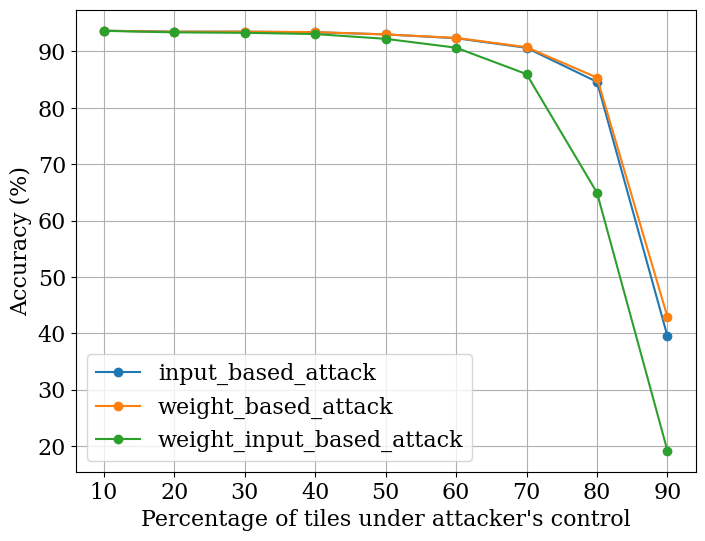

In [42]:
# Sort x-axis values in descending order
x_values = sorted([float(k.split('_')[0]) for k in data_r18['input_based_attack'].keys()], reverse=True)

# Convert x-axis values to string format matching the keys in the dictionary
formatted_x_values = [f"{int(100-x)}.0_{int(x)}.0" for x in x_values]

# Plot data
plt.figure(figsize=(8, 6))
for attack_type, values in data_r18.items():
    y_values = [values[key] for key in formatted_x_values]
    plt.plot(x_values, y_values, marker='o', label=attack_type)

# Labels and legend
plt.xlabel("Percentage of tiles under attacker's control")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.savefig("r18_var.png", dpi=300)
# Show plot
plt.show()


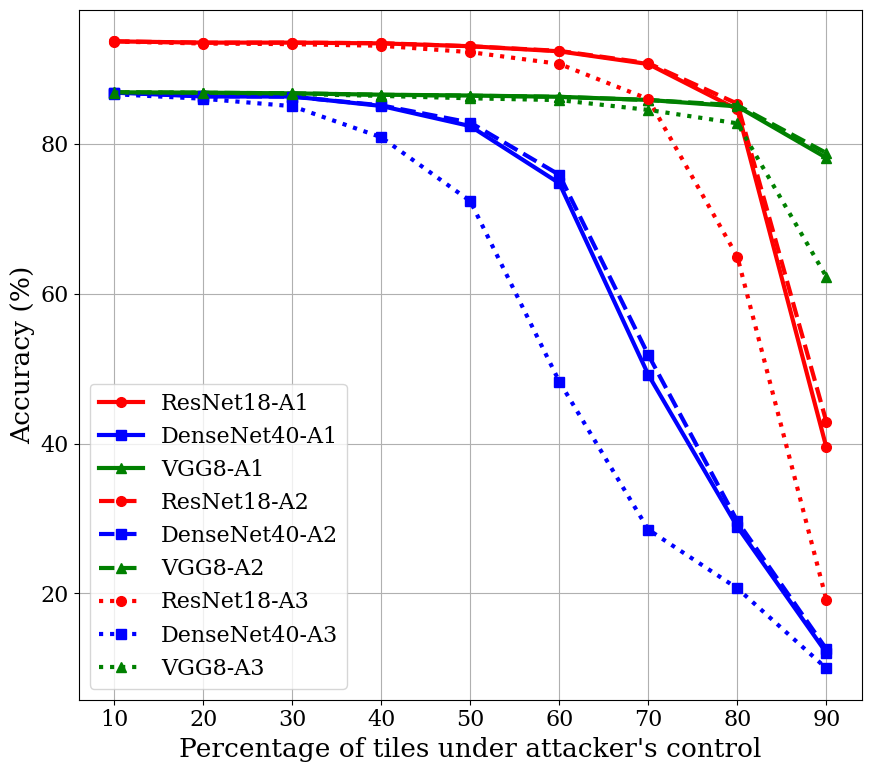

In [39]:
import builtins  # Ensure we use the original list function

def extract_sorted_keys(data_dict):
    keys = builtins.list(data_dict.keys())  # Ensure it's a proper list
    sorted_keys = sorted(keys, key=lambda k: float(k.split('_')[1]))  # Sort by right-side value
    return sorted_keys


# Step 2: Plot settings
fig, ax = plt.subplots(figsize=(9, 8))

# Attack types: (dict_key, label, line_style)
attack_types = [
    ('input_based_attack', 'A1', '-'),   # Solid line
    ('weight_based_attack', 'A2', '--'),  # Dashed line
    ('weight_input_based_attack', 'A3', ':')  # Dotted line
]

# Models: (dict, label, marker, color)
models = [
    (data_r18, "ResNet18", "o", "red"),
    (data_d40, "DenseNet40", "s", "blue"),
    (data_vgg8, "VGG8", "^", "green"),
]

# Step 3: Plot all attack types for all models
for attack_key, attack_label, line_style in attack_types:
    for model_dict, model_label, marker, color in models:
        sorted_keys = extract_sorted_keys(model_dict[attack_key])  # Sorted keys
        x_vals = [float(k.split('_')[1]) for k in sorted_keys]  # Extract right part as x-axis
        y_vals = [model_dict[attack_key][k] for k in sorted_keys]  # Get corresponding accuracy

        ax.plot(
            x_vals, y_vals,
            label=f"{model_label}-{attack_label}",  # e.g. "ResNet18-A1"
            marker=marker,
            linestyle=line_style,
            color=color,
            linewidth=3,
            markersize=7
        )

# Step 4: Final adjustments
ax.set_xlabel("Percentage of tiles under attacker's control", fontsize=19)
ax.set_ylabel("Accuracy (%)", fontsize=19)
# ax.set_title("Comparison of Attacks Across Models", fontsize=14)

# Legend and grid
ax.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.savefig("all_model_var.png", dpi=300)
plt.show()

Surrounded by attacker degress of surrounding

In [1]:
model_names = ['resnet18', 'densenet40', 'vgg8']
modes = ['attacker']
baseline_path = 'baseline_acc'
attack_names = ['input_based_attack', 'weight_based_attack', 'weight_input_based_attack'] 
configs = []

list = [1, 2, 3, 4, 5, 6, 7, 9]

for l in list:
    l1 = round(1000-l,1)
    configs.append(f"{l*100}_{(1-l)*100}")
print(configs)

['100_0', '200_-100', '300_-200', '400_-300', '500_-400', '600_-500', '700_-600', '900_-800']


In [4]:
baseline_path = 'baseline_acc' 
accuracy_data = {}
for model_name in model_names:
    accuracy_data[model_name] = {}
    delta_accuracy = {}
    baseline_accuracy = torch.load(f'{baseline_path}/accuracy_data_{model_name}.pt')
    for mode in modes:
        
        for attack_no,attack_name in enumerate(attack_names):
            accuracy_data[model_name][attack_name] = {} 
            for config_no,config in enumerate(configs):
                
                print(config)
                path = f'results_spe/{attack_name}/{model_name}/{config}/accuracy_output_{mode}.txt'
                print(path)
                print(extract_accuracy_from_file(path)/100,2)
                accuracy_data[model_name][attack_name][config] =  round(extract_accuracy_from_file(path)/100,2)
                print(accuracy_data[model_name][attack_name][config] )
                # delta_accuracy[f'A_{attack_no}_C_{config_no}'] = accuracy_data[f'A_{attack_no}_C_{config_no}'] 
            
    torch.save(accuracy_data, f'accuracy/accuracy_data_{model_name}_{mode}.pt')
        # torch.save(delta_accuracy, f'accuracy/delta_accuracy_{model_name}_{mode}.pt')
    print(accuracy_data)

100_0
results_spe/input_based_attack/resnet18/100_0/accuracy_output_attacker.txt
92.83 2
92.83
200_-100
results_spe/input_based_attack/resnet18/200_-100/accuracy_output_attacker.txt
91.06 2
91.06
300_-200
results_spe/input_based_attack/resnet18/300_-200/accuracy_output_attacker.txt
87.01 2
87.01
400_-300
results_spe/input_based_attack/resnet18/400_-300/accuracy_output_attacker.txt
78.1 2
78.1
500_-400
results_spe/input_based_attack/resnet18/500_-400/accuracy_output_attacker.txt
62.98 2
62.98
600_-500
results_spe/input_based_attack/resnet18/600_-500/accuracy_output_attacker.txt
41.34 2
41.34
700_-600
results_spe/input_based_attack/resnet18/700_-600/accuracy_output_attacker.txt
24.65 2
24.65
900_-800
results_spe/input_based_attack/resnet18/900_-800/accuracy_output_attacker.txt
17.68 2
17.68
100_0
results_spe/weight_based_attack/resnet18/100_0/accuracy_output_attacker.txt
92.88 2
92.88
200_-100
results_spe/weight_based_attack/resnet18/200_-100/accuracy_output_attacker.txt
91.29 2
91.29
30

/tmp/ipykernel_1610722/1809043617.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  baseline_accuracy = torch.load(f'{baseline_path}/accuracy_data_{model_name}.pt')


In [5]:
data_vgg8 = accuracy_data["vgg8"]
data_d40 = accuracy_data["densenet40"]
data_r18 = accuracy_data["resnet18"]
print(data_r18)
print(data_d40)
print(data_vgg8)

{'input_based_attack': {'100_0': 92.83, '200_-100': 91.06, '300_-200': 87.01, '400_-300': 78.1, '500_-400': 62.98, '600_-500': 41.34, '700_-600': 24.65, '900_-800': 17.68}, 'weight_based_attack': {'100_0': 92.88, '200_-100': 91.29, '300_-200': 87.66, '400_-300': 79.7, '500_-400': 65.77, '600_-500': 44.76, '700_-600': 26.74, '900_-800': 18.92}, 'weight_input_based_attack': {'100_0': 91.66, '200_-100': 86.13, '300_-200': 70.87, '400_-300': 42.46, '500_-400': 23.38, '600_-500': 19.35, '700_-600': 10.67, '900_-800': 10.0}}
{'input_based_attack': {'100_0': 83.85, '200_-100': 70.29, '300_-200': 45.16, '400_-300': 29.18, '500_-400': 24.64, '600_-500': 21.44, '700_-600': 17.39, '900_-800': 10.6}, 'weight_based_attack': {'100_0': 84.15, '200_-100': 71.93, '300_-200': 48.07, '400_-300': 30.08, '500_-400': 25.16, '600_-500': 21.67, '700_-600': 18.34, '900_-800': 10.87}, 'weight_input_based_attack': {'100_0': 76.63, '200_-100': 38.25, '300_-200': 27.17, '400_-300': 21.33, '500_-400': 17.19, '600_-

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]


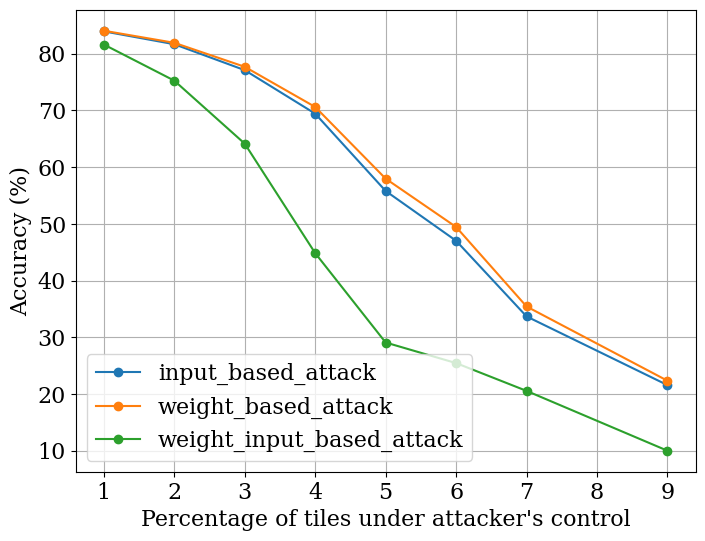

In [55]:
# Sort x-axis values in descending order
x_values = sorted([float(k.split('_')[0]) // 100 for k in data_vgg8['input_based_attack'].keys()], reverse=False)
print(x_values)
# Convert x-axis values to string format matching the keys in the dictionary
formatted_x_values = [f"{int(x)*100}_{(1-int(x))*100}" for x in x_values]

# Plot data
plt.figure(figsize=(8, 6))
for attack_type, values in data_vgg8.items():
    y_values = [values[key] for key in formatted_x_values]
    plt.plot(x_values, y_values, marker='o', label=attack_type)

# Labels and legend
plt.xlabel("Percentage of tiles under attacker's control")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.savefig("vgg8_spe.png", dpi=300)
# Show plot
plt.show()


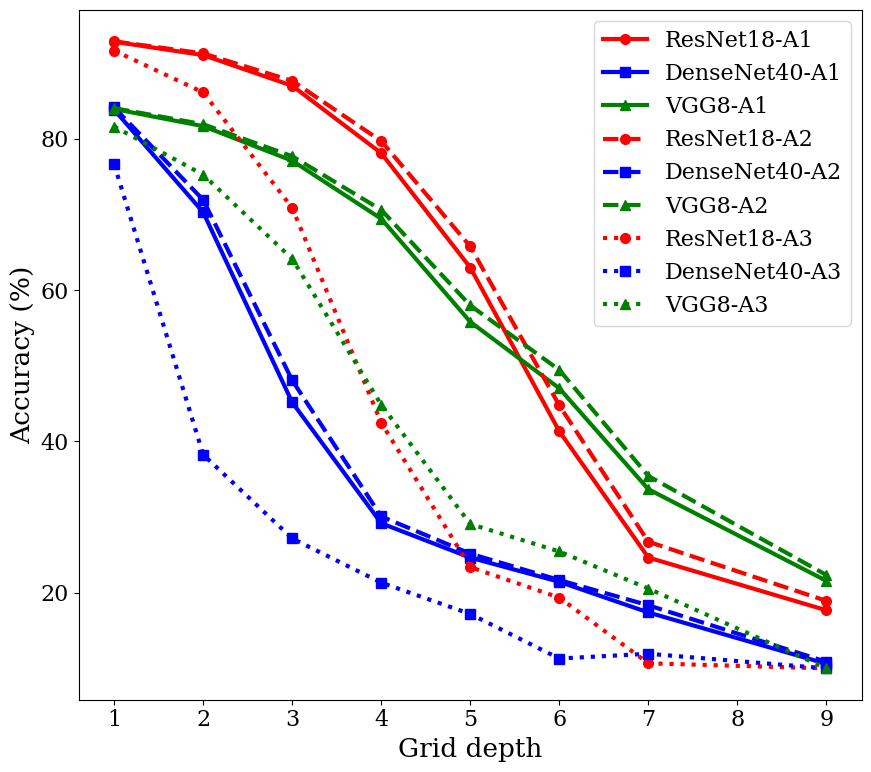

In [ ]:
import matplotlib.pyplot as plt

# -- 1) Dictionaries with your data --
##these data are the expanded version of the data generated to segregate to generate the results. 
resnet18_dict = {
    'input_based_attack': {
        '100_0': 92.83, '200_-100': 91.06, '300_-200': 87.01,
        '400_-300': 78.1, '500_-400': 62.98, '600_-500': 41.34,
        '700_-600': 24.65, '900_-800': 17.68
    },
    'weight_based_attack': {
        '100_0': 92.88, '200_-100': 91.29, '300_-200': 87.66,
        '400_-300': 79.7, '500_-400': 65.77, '600_-500': 44.76,
        '700_-600': 26.74, '900_-800': 18.92
    },
    'weight_input_based_attack': {
        '100_0': 91.66, '200_-100': 86.13, '300_-200': 70.87,
        '400_-300': 42.46, '500_-400': 23.38, '600_-500': 19.35,
        '700_-600': 10.67, '900_-800': 10.0
    }
}

densenet40_dict = {
    'input_based_attack': {
        '100_0': 83.85, '200_-100': 70.29, '300_-200': 45.16,
        '400_-300': 29.18, '500_-400': 24.64, '600_-500': 21.44,
        '700_-600': 17.39, '900_-800': 10.6
    },
    'weight_based_attack': {
        '100_0': 84.15, '200_-100': 71.93, '300_-200': 48.07,
        '400_-300': 30.08, '500_-400': 25.16, '600_-500': 21.67,
        '700_-600': 18.34, '900_-800': 10.87
    },
    'weight_input_based_attack': {
        '100_0': 76.63, '200_-100': 38.25, '300_-200': 27.17,
        '400_-300': 21.33, '500_-400': 17.19, '600_-500': 11.3,
        '700_-600': 11.93, '900_-800': 10.0
    }
}

vgg8_dict = {
    'input_based_attack': {
        '100_0': 83.94, '200_-100': 81.67, '300_-200': 77.1,
        '400_-300': 69.43, '500_-400': 55.8, '600_-500': 47.02,
        '700_-600': 33.68, '900_-800': 21.57
    },
    'weight_based_attack': {
        '100_0': 84.05, '200_-100': 81.92, '300_-200': 77.69,
        '400_-300': 70.61, '500_-400': 57.97, '600_-500': 49.45,
        '700_-600': 35.43, '900_-800': 22.34
    },
    'weight_input_based_attack': {
        '100_0': 81.62, '200_-100': 75.25, '300_-200': 64.14,
        '400_-300': 44.84, '500_-400': 29.08, '600_-500': 25.45,
        '700_-600': 20.55, '900_-800': 10.0
    }
}


# -- 2) Helper function to parse keys like "100_0" -> x=1,2,3,..., y=<accuracy> --
def parse_keys_to_xy(sub_dict):
    x_vals = []
    y_vals = []
    for k, v in sub_dict.items():
        # Extract the integer before '_' and map 100->1, 200->2, etc.
        x_part = int(k.split('_')[0]) // 100
        x_vals.append(x_part)
        y_vals.append(v)
    return x_vals, y_vals


# -- 3) Single plot (no subplots) with different line styles for attacks,
#       different markers for models, and a bigger figsize so legend fits.

# Attack types: (dict_key, label, line_style)
attack_types = [
    ("input_based_attack",         "A1", "-"),   # solid line
    ("weight_based_attack",        "A2", "--"),  # dashed line
    ("weight_input_based_attack",  "A3", ":")    # dotted line
]

# Models: (dict, label, marker, color optional)
models = [
    (resnet18_dict,    "ResNet18",   "o", "red"),
    (densenet40_dict,  "DenseNet40", "s", "blue"),
    (vgg8_dict,        "VGG8",       "^", "green"),
]

# Increase figure size for clarity
fig, ax = plt.subplots(figsize=(9, 8))

# Plot each combination of (attack type, model)
for attack_key, attack_label, line_style in attack_types:
    for model_dict, model_label, marker, color in models:
        x_vals, y_vals = parse_keys_to_xy(model_dict[attack_key])
        ax.plot(
            x_vals,
            y_vals,
            label=f"{model_label}-{attack_label}",  # e.g. "ResNet18-A1"
            marker=marker,
            linestyle=line_style,
            color=color,
            linewidth=3,
            markersize=7
        )

ax.set_xlabel("Grid depth", fontsize=19)
ax.set_ylabel("Accuracy (%)", fontsize=19)
# ax.set_title("All Models & All Attacks in One Plot", fontsize=14)

# Put the legend outside or just let it pick best location
# Option 1 (inside):
# ax.legend(loc="best")

# Option 2 (outside, to the right):
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig("all_model_spe.png", dpi=300)
plt.show()
